<a href="https://colab.research.google.com/github/matteocantafio/Fraud-detection-using-machine-learning/blob/main/Fraud_Detection_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

# Upload the CSV file
from google.colab import drive
drive.mount('/content/drive')
#now you can access your files in drive
#for example to read a csv file in the folder "Credit Card Fraud Detection_TDM" in your drive:
df = pd.read_csv('/content/drive/MyDrive/Credit Card Fraud Detection_TDM/creditcard.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Credit Card Fraud Detection_TDM/creditcard.csv')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The description of the dataset affirms that the features V1,...,V28 are the results of a Principal Component analysis

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
no_fraud_percentage = (df['Class'] == 0).sum() / len(df) * 100

# Calculate the percentage of 'Class' values equal to 1
fraud_percentage = (df['Class'] == 1).sum() / len(df) * 100

# Print the results
print(f"Percentage of 'No Fraud' (Class = 0): {no_fraud_percentage:.2f}%")
print(f"Percentage of 'Fraud' (Class = 1): {fraud_percentage:.2f}%")

Percentage of 'No Fraud' (Class = 0): 99.83%
Percentage of 'Fraud' (Class = 1): 0.17%


<ipython-input-14-7a4bbc29d363>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=colors)


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

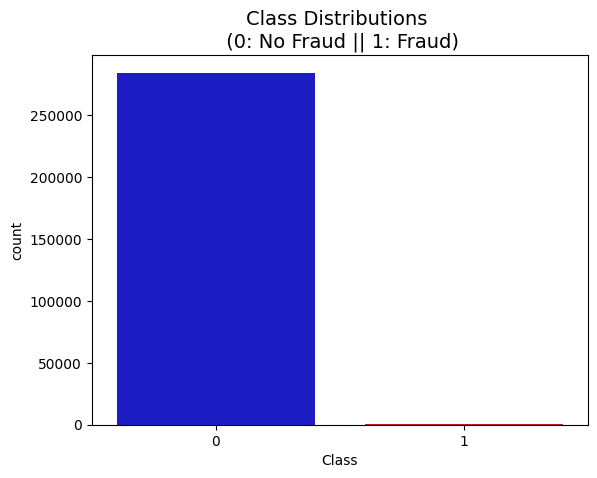

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select features for standardization
features_to_standardize = ['Amount', 'Time']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected features
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

# Rename the standardized columns
df = df.rename(columns={
    'Amount': 'Standardized_Amount',
    'Time': 'Standardized_Time'
})

In [ ]:
df.head()

,Standardized_Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Standardized_Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


Features Selection

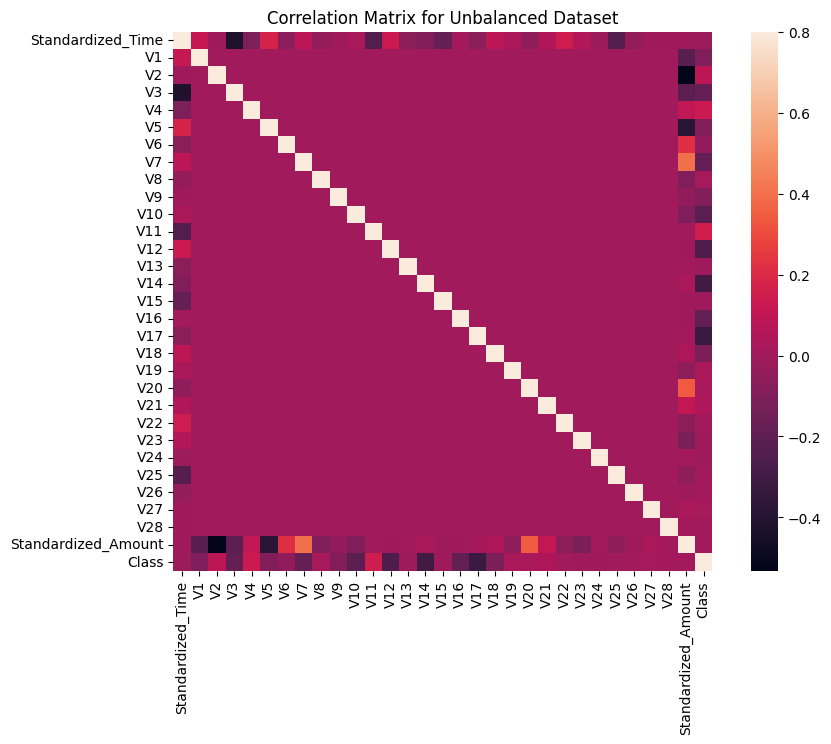

In [20]:
corrmat = df.corr()
fig = plt.figure(figsize = (10, 7))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.title('Correlation Matrix for Unbalanced Dataset')
plt.show()

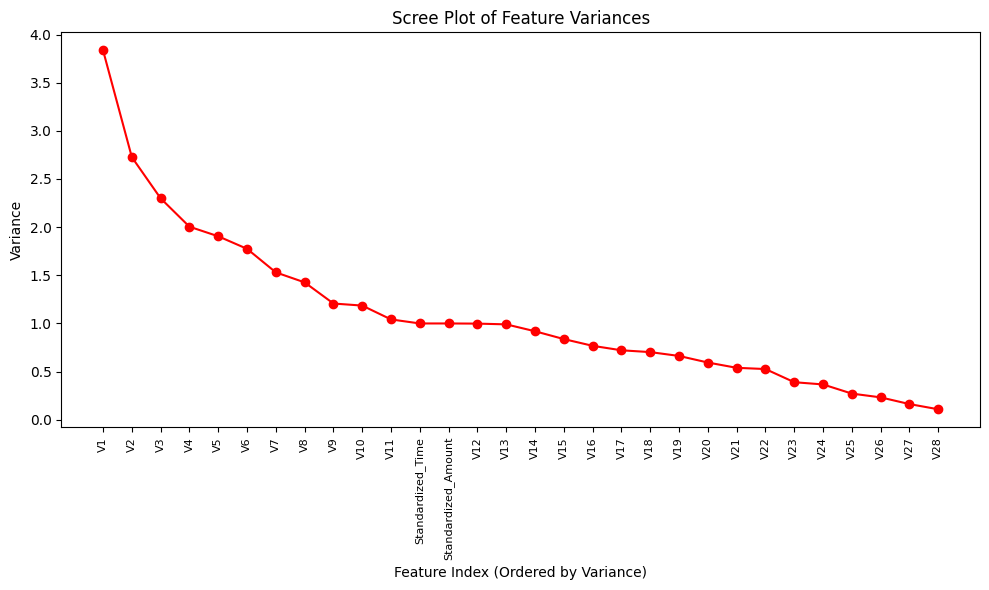

,Feature,Variance,Variance_Percentage,Cumulative_Variance_Percentage
1,V1,3.836489,11.720965,11.720965
2,V2,2.726820,8.330784,20.051749
3,V3,2.299029,7.023828,27.075577
4,V4,2.004684,6.124565,33.200142
5,V5,1.905081,5.820266,39.020408
6,V6,1.774946,5.422688,44.443096
7,V7,1.530401,4.675569,49.118665
8,V8,1.426479,4.358075,53.476740
9,V9,1.206992,3.687516,57.164256
10,V10,1.185594,3.622141,60.786397


In [33]:
df2=df.copy()
df2.drop(['Class'], axis=1, inplace=True)
variances = df2.var()

# Create a DataFrame from the variances
variance_df = pd.DataFrame({'Feature': variances.index, 'Variance': variances.values})

# Sort the DataFrame by variance in descending order
variance_df = variance_df.sort_values(by='Variance', ascending=False)

# Calculate the percentage of variance for each feature
variance_df['Variance_Percentage'] = (variance_df['Variance'] / variance_df['Variance'].sum()) * 100

# Calculate the cumulative percentage of variance
variance_df['Cumulative_Variance_Percentage'] = variance_df['Variance_Percentage'].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(len(variance_df)), variance_df['Variance'], marker='o', linestyle='-', color='r')
plt.title('Scree Plot of Feature Variances')
plt.xlabel('Feature Index (Ordered by Variance)')
plt.ylabel('Variance')
plt.xticks(range(len(variance_df)), variance_df['Feature'], rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

variance_df

We decide to remove the the features from V19 to V28, in order to explain the 90% of the cumulative variance of the initial dataset

In [34]:
# Drop features V20 to V28
df3=df.copy()
df3 = df3.drop(['V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1)

First Approach: Random Undersampling before Cross Validation

In [45]:
# prompt: create a new dataframe by random undersampling Negative Class of the df3 by taking all the rows with "Class"=1 and selecting randomly 800 rows with Class=0.

# Separate the classes
df_class_0 = df3[df3['Class'] == 0]
df_class_1 = df3[df3['Class'] == 1]

# Undersample class 0
df_class_0_undersampled = df_class_0.sample(n=800, random_state=42) # Use random_state for reproducibility

# Concatenate the undersampled class 0 with class 1
df_undersampled = pd.concat([df_class_0_undersampled, df_class_1])



df_undersampled = df_undersampled.sample(frac=1, random_state=42)
df_undersampled

,Standardized_Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V13,V14,V15,V16,V17,V18,V19,Standardized_Amount,Class
96074,-0.615289,1.328732,-0.581801,0.307400,-0.491635,-0.786679,-0.400280,-0.466810,-0.109662,-0.606910,...,0.025826,0.565172,-0.492565,-0.375890,0.152688,0.965864,-2.269984,0.568934,-0.245681,0
153469,0.091500,1.941775,1.190858,-1.911652,4.025149,1.526096,0.152457,0.210495,-0.012158,0.107301,...,-3.163775,0.932465,-0.808366,-1.894364,2.175975,1.541643,1.589065,-1.244548,-0.337237,0
174260,0.569157,1.203808,-1.859793,-3.741163,-1.645642,1.170444,0.387977,1.183471,-0.174911,0.762496,...,1.008562,-0.615703,1.345252,0.695314,-1.959913,0.482532,-0.929826,0.274335,1.505881,0
7129,-1.799776,-0.573353,0.559349,2.170760,-0.217555,-0.025883,0.195947,0.302353,0.091778,2.011744,...,-2.649760,-0.439181,1.101009,-2.729660,-0.084105,0.368636,0.517881,0.036603,-0.353189,0
84735,-0.723863,-0.377304,0.572787,1.333869,-0.000070,0.304511,-0.084981,0.497673,0.022442,0.100338,...,-0.140484,-0.022090,-0.318304,-0.581975,-0.244371,-0.188036,-0.117347,0.713008,-0.301454,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118308,-0.416544,-0.430330,0.985633,0.645789,0.317131,0.616332,-1.347462,1.078234,-0.161518,-0.492856,...,-0.664684,-0.985700,-0.660968,0.344105,0.530852,0.278142,0.355530,-1.081223,-0.232727,1
150647,-0.020844,-3.632809,5.437263,-9.136521,10.307226,-5.421830,-2.864815,-10.634088,3.018127,-4.891640,...,-18.553697,-0.339533,-15.623187,-0.188979,-12.427961,-20.159047,-6.888891,2.586093,-0.319086,1
153823,0.113905,-19.641857,14.706335,-22.801238,12.114672,-14.898113,0.840778,-28.011293,-11.919639,-8.960922,...,-12.686308,-1.071443,-7.383370,-2.992430,-8.582309,-13.806568,-6.000359,1.422632,-0.344114,1
14338,-1.461164,1.125336,1.130146,-0.962975,2.675688,0.990075,-0.243318,0.316192,0.122960,-1.143343,...,-0.491243,-1.129907,-2.238622,0.278469,1.477926,1.776454,1.149282,-1.306995,-0.338197,1


In [50]:
# prompt: shuffle the rows of the dataframe df_undersampled

from sklearn.utils import shuffle

df_undersampled = shuffle(df_undersampled, random_state=42)


In [48]:
df_undersampled

,Standardized_Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V13,V14,V15,V16,V17,V18,V19,Standardized_Amount,Class
64118,-0.922039,-0.313392,0.958943,0.156170,-0.741782,1.026021,0.036919,0.682575,0.087535,0.076228,...,-0.561500,-0.076113,-0.443499,0.669489,0.761131,-0.563131,-0.153594,-0.722587,-0.317287,0
15476,-1.430904,-21.209120,12.652197,-23.553933,6.174078,-16.026658,-4.422195,-16.229444,14.116002,-3.922741,...,-7.740816,0.384814,-8.078241,-0.014900,-6.701289,-13.159267,-4.903031,1.146275,0.046539,1
152019,0.040076,-3.705856,4.107873,-3.803656,1.710314,-3.582466,1.469729,-9.621560,-11.913105,-0.322297,...,-4.381078,2.063299,-0.673818,1.400763,-4.254927,-5.160213,-1.302526,2.594453,-0.349231,1
77992,-0.789585,-0.833781,0.555928,0.376923,-0.814204,-0.683483,0.266157,-0.043950,0.414711,-1.643608,...,0.198269,0.699420,-1.079855,-0.335005,0.853354,1.559737,-0.889783,1.520706,0.046539,0
214662,0.946620,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,...,-5.019610,-1.019691,-7.914989,0.669648,-4.472014,-5.856998,-2.243178,-0.173814,0.128700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14327,-1.461501,1.534526,-0.989328,0.697491,-1.414794,-1.564763,-0.574557,-1.194031,-0.177944,-1.734993,...,-0.448462,1.735289,-0.736935,0.746742,-0.096465,0.180675,0.290068,-0.311899,-0.324443,0
274057,1.495537,-2.050964,1.650261,0.073770,-1.187032,0.925928,-0.675111,0.738918,0.424664,-0.528096,...,1.013132,0.527661,-0.802739,-1.138041,0.679519,0.182099,0.108458,-0.361075,-0.316327,0
212718,0.929816,-1.249157,1.323139,-2.751282,-1.241107,1.778709,4.737050,-0.201078,-3.691615,-0.493907,...,-0.007643,-0.511156,-0.106499,1.085084,0.261872,0.607587,0.613561,-0.456504,1.341479,0
213116,0.932932,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,...,-4.563675,1.182503,-6.964972,1.115340,-4.997332,-6.419539,-1.183593,3.569733,-0.320045,1


<ipython-input-51-4fe7c68f8b2f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df_undersampled, palette=colors)


Text(0.5, 1.0, 'Class Distributions Undersampled Dataset \n (0: No Fraud || 1: Fraud)')

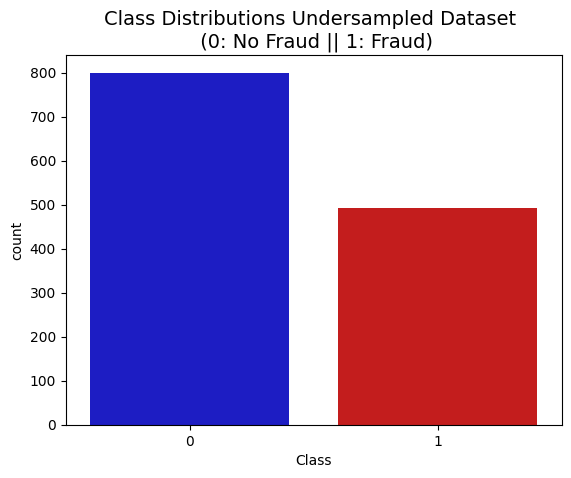

In [51]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df_undersampled, palette=colors)
plt.title('Class Distributions Undersampled Dataset \n (0: No Fraud || 1: Fraud)', fontsize=14)

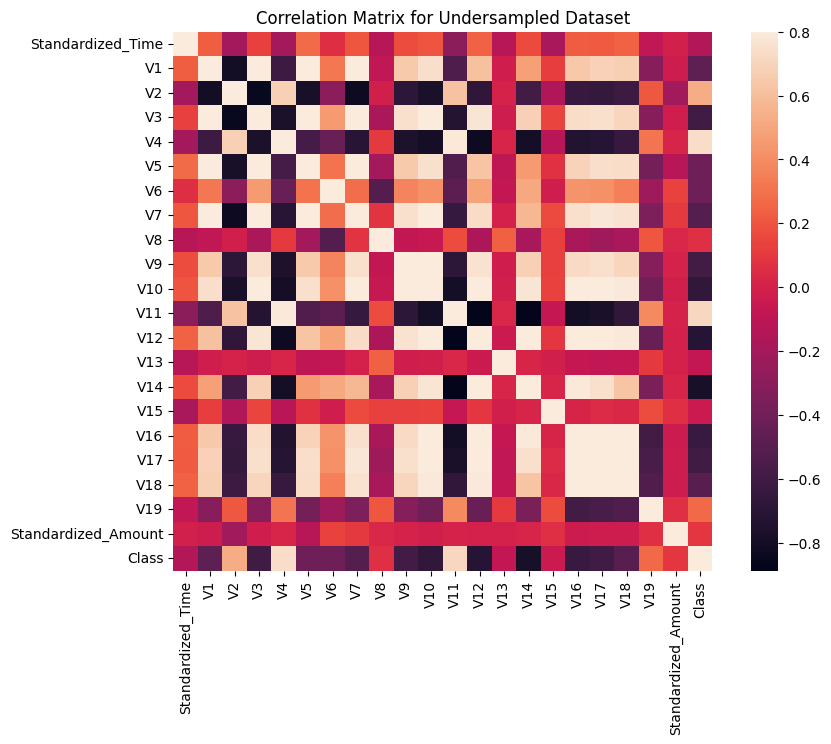

In [55]:
corrmat = df_undersampled.corr()
fig2 = plt.figure(figsize = (10, 7))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.title('Correlation Matrix for Undersampled Dataset')
plt.show()

Training Machine learning models

In [70]:
X = df_undersampled.drop('Class', axis=1)
y = df_undersampled['Class']

In [61]:
X

,Standardized_Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11,V12,V13,V14,V15,V16,V17,V18,V19,Standardized_Amount
238723,1.157725,-1.270305,-0.197522,1.946088,-0.668329,0.777826,-0.133728,-0.179701,0.372234,0.120052,...,0.489695,0.240142,-0.802024,0.143956,-0.132300,0.302253,-0.763190,1.101941,0.005601,-0.265271
10712,-1.614740,1.162768,-0.318437,1.146652,-0.484948,-1.128288,-0.493098,-0.729390,0.007508,3.096014,...,1.002808,-1.632277,1.411650,1.358546,0.776475,-0.852529,0.990991,-0.078136,-0.131094,-0.305852
231002,1.089877,-0.818874,1.030995,0.660092,4.459477,0.048519,2.641448,-1.330344,1.685571,-1.676140,...,0.358639,0.007558,-0.644308,0.852254,0.862600,-0.223740,0.962252,-0.150727,0.140431,-0.262553
253223,1.291675,0.145153,1.137213,-1.070413,0.020831,0.261001,-1.403149,0.753038,0.052488,-0.281510,...,-0.497865,0.276812,0.723944,-0.759755,0.582407,0.211746,0.628948,0.681701,-0.283084,-0.182071
63634,-0.926672,-9.169790,7.092197,-12.354037,4.243069,-7.176438,-3.386618,-8.058012,6.442909,-2.412987,...,2.826671,-6.309843,-0.623002,-7.279869,0.924233,-4.215537,-7.171672,-2.550337,0.596364,0.046539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91235,-0.662100,1.004483,-0.298622,1.209163,0.561570,-0.396481,1.437491,-0.939766,0.592545,0.726027,...,0.699306,1.037244,0.430656,-0.264407,1.665541,-1.050982,0.977258,-2.097777,-1.902693,-0.353189
6899,-1.809631,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,...,7.102989,-9.928700,-0.067498,-10.924187,-1.697914,-2.379421,-2.775114,0.273799,-1.382188,-0.349231
248639,1.246843,-0.348468,1.071708,-1.986570,-1.599706,2.915072,3.169605,0.186222,1.140047,0.009331,...,0.102230,-0.078551,-0.397615,-0.714486,0.161444,0.232885,0.408604,-0.381299,-0.430174,-0.345313
157918,0.332781,-1.101035,-1.674928,-0.573388,5.617556,0.765556,0.440607,1.934740,-1.019788,-0.193244,...,0.606911,-2.854275,2.379473,1.268147,-0.283619,-0.482192,0.811005,-0.357911,0.752761,2.185955


In [71]:
y.head()

,Class
238723,0
10712,0
231002,0
253223,0
63634,1


Hyperparameter tuning with Bayesian Optimization

In [66]:
!pip install bayesian-optimization


In [72]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from bayes_opt import BayesianOptimization
import numpy as np


# Funzione obiettivo per l'ottimizzazione SVC
def svc_cv(C, gamma):
    """Calcola la media dell'accuratezza usando StratifiedKFold."""
    model = SVC(C=C, gamma=gamma, kernel='rbf', random_state=42)
    cv = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores.mean()

# Funzione obiettivo per l'ottimizzazione della rete neurale
def nn_cv(alpha, hidden_layer_1, hidden_layer_2, hidden_layer_3):
    """Calcola la media dell'accuratezza usando StratifiedKFold."""
    hidden_layers = (int(hidden_layer_1), int(hidden_layer_2), int(hidden_layer_3))
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layers,
        activation='relu',
        max_iter=500,
        alpha=alpha,
        random_state=42
    )
    cv = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores.mean()

# Funzione obiettivo per l'ottimizzazione dell'albero decisionale
def dt_cv(min_samples_leaf, max_depth, min_samples_split):
    """Calcola la media dell'accuratezza usando StratifiedKFold."""
    model = DecisionTreeClassifier(
        min_samples_leaf=int(min_samples_leaf),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        random_state=42
    )
    cv = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores.mean()

# Ottimizzazione Bayesiana per SVC
svc_bounds = {'C': (0.1, 500), 'gamma': (0.01, 10)}
svc_optimizer = BayesianOptimization(
    f=svc_cv,
    pbounds=svc_bounds,
    random_state=42,
    verbose=2
)
svc_optimizer.maximize(init_points=10, n_iter=25)

# Ottimizzazione Bayesiana per rete neurale
nn_bounds = {
    'alpha': (1e-5, 1e-1),
    'hidden_layer_1': (1, 10),
    'hidden_layer_2': (1, 10),
    'hidden_layer_3': (1, 10)
}
nn_optimizer = BayesianOptimization(
    f=nn_cv,
    pbounds=nn_bounds,
    random_state=42,
    verbose=2
)
nn_optimizer.maximize(init_points=10, n_iter=25)

# Ottimizzazione Bayesiana per albero decisionale
dt_bounds = {
    'min_samples_leaf': (1, 20),
    'max_depth': (1, 20),
    'min_samples_split': (2, 20)
}
dt_optimizer = BayesianOptimization(
    f=dt_cv,
    pbounds=dt_bounds,
    random_state=42,
    verbose=2
)
dt_optimizer.maximize(init_points=10, n_iter=25)

# Recupera i parametri ottimali
svc_best_params = svc_optimizer.max['params']
nn_best_params = nn_optimizer.max['params']
dt_best_params = dt_optimizer.max['params']

# Calcola l'accuratezza finale per ciascun modello
svc_model = SVC(C=svc_best_params['C'], gamma=svc_best_params['gamma'], kernel='rbf', random_state=42, probability=True)
svc_cv_final = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
svc_final_accuracy = cross_val_score(svc_model, X, y, cv=svc_cv_final, scoring='accuracy').mean()

nn_model = MLPClassifier(
    hidden_layer_sizes=(
        int(nn_best_params['hidden_layer_1']),
        int(nn_best_params['hidden_layer_2']),
        int(nn_best_params['hidden_layer_3'])
    ),
    activation='relu',
    max_iter=500,
    alpha=nn_best_params['alpha'],
    random_state=42
)
nn_cv_final = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
nn_final_accuracy = cross_val_score(nn_model, X, y, cv=nn_cv_final, scoring='accuracy').mean()

dt_model = DecisionTreeClassifier(
    min_samples_leaf=int(dt_best_params['min_samples_leaf']),
    max_depth=int(dt_best_params['max_depth']),
    min_samples_split=int(dt_best_params['min_samples_split']),
    random_state=42
)
dt_cv_final = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
dt_final_accuracy = cross_val_score(dt_model, X, y, cv=dt_cv_final, scoring='accuracy').mean()

# Stampa risultati
print("Risultati SVC:")
print(f"Migliori parametri trovati: C={svc_best_params['C']:.4f}, gamma={svc_best_params['gamma']:.4f}")
print(f"Accuratezza media con i parametri ottimali: {svc_final_accuracy:.4f}")

print("\nRisultati Rete Neurale:")
print(f"Migliori parametri trovati: alpha={nn_best_params['alpha']:.6f}, \
      hidden_layer_sizes=({int(nn_best_params['hidden_layer_1'])}, {int(nn_best_params['hidden_layer_2'])}, {int(nn_best_params['hidden_layer_3'])})")
print(f"Accuratezza media con i parametri ottimali: {nn_final_accuracy:.4f}")

print("\nRisultati Albero Decisionale:")
print(f"Migliori parametri trovati: min_samples_leaf={int(dt_best_params['min_samples_leaf'])}, \
      max_depth={int(dt_best_params['max_depth'])}, min_samples_split={int(dt_best_params['min_samples_split'])}")
print(f"Accuratezza media con i parametri ottimali: {dt_final_accuracy:.4f}")

# Output per Orange
out_object = {'svc': svc_model, 'nn': nn_model, 'dt': dt_model}



|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.6409    | 187.3     | 9.508     |
| 2         | 0.6424    | 366.0     | 5.991     |
| 3         | 0.6563    | 78.09     | 1.568     |
| 4         | 0.6409    | 29.14     | 8.663     |
| 5         | 0.6409    | 300.6     | 7.084     |
| 6         | 0.6409    | 10.39     | 9.699     |
| 7         | 0.6432    | 416.2     | 2.131     |
| 8         | 0.6432    | 90.99     | 1.842     |
| 9         | 0.644     | 152.2     | 5.252     |
| 10        | 0.6432    | 216.0     | 2.919     |
| 11        | 0.6494    | 77.96     | 1.651     |
| 12        | 0.6455    | 78.07     | 1.729     |
| 13        | 0.644     | 50.77     | 5.221     |
| 14        | 0.6602    | 78.51     | 1.42      |
| 15        | 0.6563    | 78.68     | 1.573     |
| 16        | 0.6494    | 79.31     | 1.659     |
| 17        | 0.6602    | 79.67     | 1.301     |
| 18        | 0.6602    | 80.01     | 1.402     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


| 1         | 0.945     | 0.03746   | 9.556     | 7.588     | 6.388     |
| 2         | 0.9559    | 0.01561   | 2.404     | 1.523     | 8.796     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


| 3         | 0.9373    | 0.06012   | 7.373     | 1.185     | 9.729     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

| 4         | 0.9489    | 0.08325   | 2.911     | 2.636     | 2.651     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

| 5         | 0.9373    | 0.03043   | 5.723     | 4.888     | 3.621     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

| 6         | 0.9536    | 0.06119   | 2.255     | 3.629     | 4.297     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

| 7         | 0.9427    | 0.04561   | 8.067     | 2.797     | 5.628     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

| 8         | 0.9512    | 0.05925   | 1.418     | 6.468     | 2.535     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

| 9         | 0.9466    | 0.006515  | 9.54      | 9.691     | 8.276     |
| 10        | 0.9497    | 0.03047   | 1.879     | 7.158     | 4.961     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


| 11        | 0.9094    | 0.04069   | 1.099     | 2.528     | 6.873     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


| 12        | 0.945     | 0.09386   | 2.322     | 1.234     | 9.249     |
| 13        | 0.9497    | 0.06909   | 1.824     | 7.053     | 4.809     |
| 14        | 0.9373    | 0.03928   | 3.088     | 1.673     | 8.245     |
| 15        | 0.6192    | 0.003964  | 1.96      | 1.638     | 8.57      |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


| 16        | 0.945     | 0.09383   | 7.357     | 5.051     | 9.986     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


| 17        | 0.945     | 0.07752   | 8.939     | 3.045     | 4.352     |
| 18        | 0.9528    | 0.07006   | 2.685     | 1.451     | 8.884     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

| 19        | 0.9427    | 0.0006403 | 5.134     | 9.79      | 5.741     |
| 20        | 0.6192    | 0.07426   | 5.726     | 3.703     | 1.177     |
| 21        | 0.952     | 0.08826   | 2.634     | 1.041     | 8.692     |
| 22        | 0.6192    | 0.02063   | 9.729     | 1.129     | 1.625     |
| 23        | 0.6192    | 0.04484   | 1.791     | 1.465     | 8.532     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

| 24        | 0.9466    | 0.03093   | 8.843     | 2.935     | 5.189     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


| 25        | 0.9474    | 0.03646   | 3.581     | 7.23      | 7.006     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


| 26        | 0.9388    | 0.09836   | 8.157     | 2.672     | 4.791     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

| 27        | 0.9497    | 0.07139   | 7.728     | 1.39      | 4.625     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


| 28        | 0.9357    | 0.08454   | 7.461     | 3.659     | 5.867     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


| 29        | 0.9466    | 0.07655   | 8.217     | 1.825     | 5.284     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


| 30        | 0.9466    | 0.04927   | 7.35      | 2.077     | 5.062     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


| 31        | 0.9512    | 0.03383   | 9.012     | 2.143     | 4.845     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


| 32        | 0.9063    | 0.005851  | 2.159     | 5.954     | 8.827     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


| 33        | 0.9435    | 0.09474   | 6.433     | 2.518     | 4.962     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


| 34        | 0.9497    | 0.05234   | 7.388     | 2.058     | 5.078     |


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

| 35        | 0.9458    | 0.04792   | 8.469     | 1.75      | 4.049     |
|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | 0.9435    | 8.116     | 19.06     | 15.18     |
| 2         | 0.9234    | 12.37     | 3.964     | 4.808     |
| 3         | 0.9334    | 2.104     | 17.46     | 12.82     |
| 4         | 0.9272    | 14.45     | 1.391     | 19.46     |
| 5         | 0.9241    | 16.82     | 5.034     | 5.273     |
| 6         | 0.9419    | 4.485     | 6.781     | 11.45     |
| 7         | 0.9327    | 9.207     | 6.533     | 13.01     |
| 8         | 0.9412    | 3.65      | 6.551     | 8.595     |
| 9         | 0.9427    | 9.665     | 15.92     | 5.594     |
| 10        | 0.935     | 10.77     | 12.26     | 2.836     |
| 11        | 0.9435    | 14.2      | 19.77     | 11.19     |
| 12        | 0.9427    | 14.53     | 18.97     | 19.41     |
| 13        | 0.9334    | 1.023     | 1.034     | 13.26   

Evaluation of the Models

In [73]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score

def evaluate_model(model, X, y):
    """
    Valuta un modello usando una 5-fold stratified cross-validation e calcola diverse metriche.
    """
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Shuffle for better randomness
    f1_scores = []
    precision_scores = []
    recall_scores = []
    roc_auc_scores = []
    accuracy_scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        try: #Handle potential errors for roc_auc_score with certain models
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            roc_auc_scores.append(roc_auc_score(y_test, y_pred_proba))
        except AttributeError:
            roc_auc_scores.append(np.nan) #Or another placeholder value

        f1_scores.append(f1_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    return {
        'f1_score': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'roc_auc': np.mean(roc_auc_scores),
        'accuracy': np.mean(accuracy_scores),
    }


# Evaluate the best models
svc_metrics = evaluate_model(svc_model, X, y)
nn_metrics = evaluate_model(nn_model, X, y)
dt_metrics = evaluate_model(dt_model, X, y)


print("\nSVC Metrics:")
for metric, value in svc_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nNeural Network Metrics:")
for metric, value in nn_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nDecision Tree Metrics:")
for metric, value in dt_metrics.items():
    print(f"{metric}: {value:.4f}")


SVC Metrics:
f1_score: 0.9196
precision: 0.9087
recall: 0.9309
roc_auc: 0.9673
accuracy: 0.9381

Neural Network Metrics:
f1_score: 0.9251
precision: 0.9491
recall: 0.9025
roc_auc: 0.9770
accuracy: 0.9443

Decision Tree Metrics:
f1_score: 0.9156
precision: 0.9427
recall: 0.8903
roc_auc: 0.9657
accuracy: 0.9373
